#Customers' Purchase Behaviour Prediction

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Load The Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fundamental Machine Learning/Assignment_2_FML_DSBA/m-2-dsba-foundation-of-machine-learning-challenge/train_dataset.csv', index_col=0)
eval = pd.read_csv('/content/drive/MyDrive/Fundamental Machine Learning/Assignment_2_FML_DSBA/m-2-dsba-foundation-of-machine-learning-challenge/eval_dataset.csv', index_col=0)

In [ ]:
# Basic Data Overview
print(data.head())
print(data.info())

     Age  Gender  Reviews_Read    Price  Discount  Category  Items_In_Cart  \
id                                                                           
0   20.0     1.0           1.0  623.797      25.0       4.0            4.0   
1   22.0     0.0           5.0  549.324      50.0       4.0            8.0   
2   18.0     0.0           2.0  489.191      19.0       0.0            5.0   
3   25.0     0.0           3.0  769.450      16.0       4.0            5.0   
4   22.0     1.0           2.0   39.308      35.0       0.0            3.0   

   Time_of_Day  Email_Interaction Device_Type Payment_Method Referral_Source  \
id                                                                             
0    afternoon                0.0     Desktop         PayPal          Direct   
1      evening                0.0     Desktop           Bank   Search_engine   
2    afternoon                0.0      Mobile           Bank           Email   
3      evening                0.0      Mobile        

## Exploratory Data Analysis

In [ ]:
# Handle missing values
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Age                            970
Gender                         141
Reviews_Read                   127
Price                          145
Discount                       124
Category                       134
Items_In_Cart                  141
Time_of_Day                    129
Email_Interaction              127
Device_Type                    124
Payment_Method                1009
Referral_Source                997
Socioeconomic_Status_Score     120
Engagement_Score               135
Purchase                         0
dtype: int64


In [ ]:
# Check for Duplicated Data
# Step 1: Check for duplicate rows in the 'data' dataset
print(data.duplicated().sum())

# Step 2: Check for duplicate rows in the 'eval' dataset
print(eval.duplicated().sum())

0
0


In [ ]:
# Checking for eval_dataset missing values
print("Missing values:\n", eval.isnull().sum())

Missing values:
 Age                           530
Gender                         59
Reviews_Read                   73
Price                          55
Discount                       76
Category                       66
Items_In_Cart                  59
Time_of_Day                    71
Email_Interaction              73
Device_Type                    76
Payment_Method                491
Referral_Source               503
Socioeconomic_Status_Score     80
Engagement_Score               65
dtype: int64


Purchase
0    0.883692
1    0.116308
Name: proportion, dtype: float64


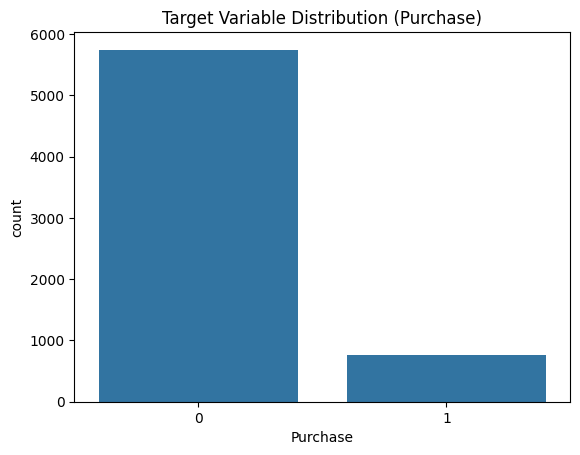

In [ ]:
# Analyze the Distribution of the Target Variable and Check for Imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Examine the distribution of the target variable 'Purchase' as proportions
print(data['Purchase'].value_counts(normalize=True))

# Step 2: Visualize the distribution of the target variable using a count plot
sns.countplot(x='Purchase', data=data)
plt.title("Target Variable Distribution (Purchase)")  # Add a title to the plot
plt.show()  # Display the plot

In [ ]:
# Preprocessing the data
# Define categorical and numerical columns
categorical_cols = ['Gender', 'Category', 'Time_of_Day', 'Email_Interaction', 'Device_Type', 'Payment_Method', 'Referral_Source']
numerical_cols = ['Age', 'Reviews_Read', 'Price', 'Discount', 'Items_In_Cart', 'Socioeconomic_Status_Score', 'Engagement_Score']

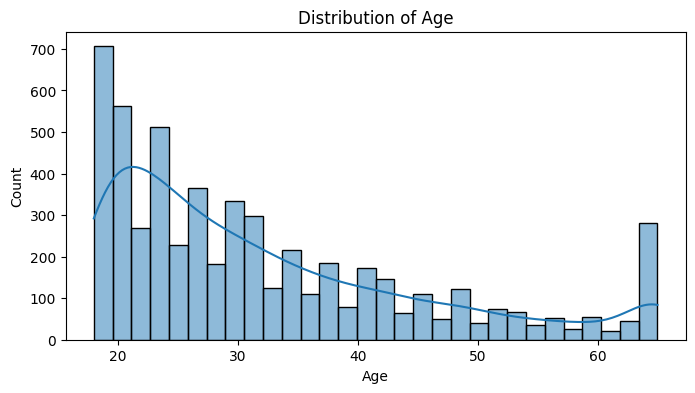

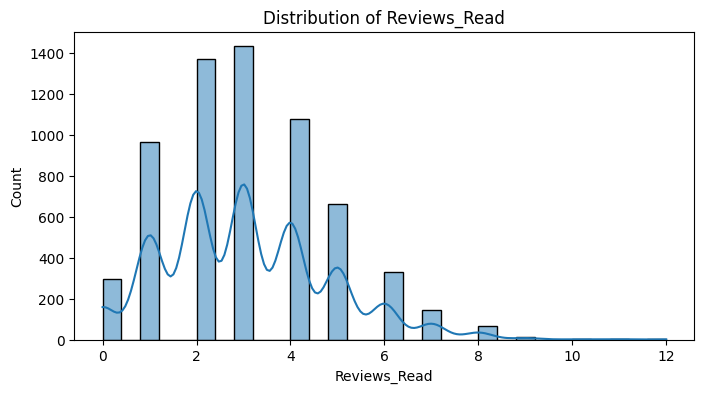

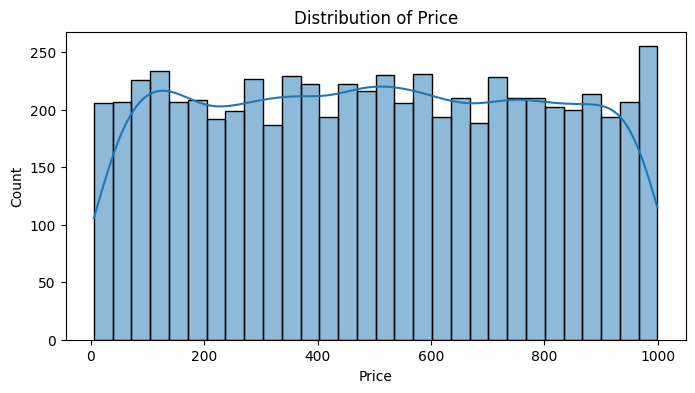

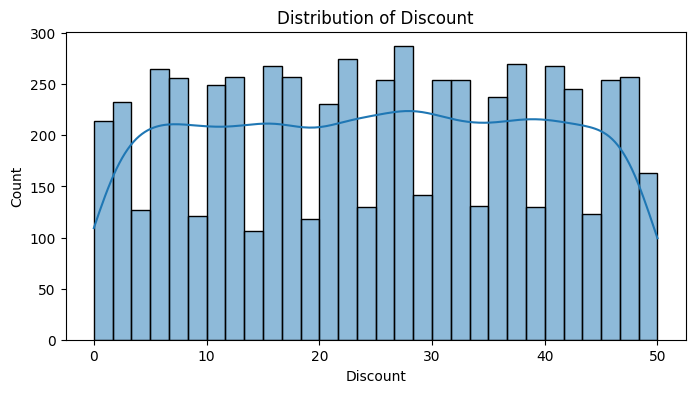

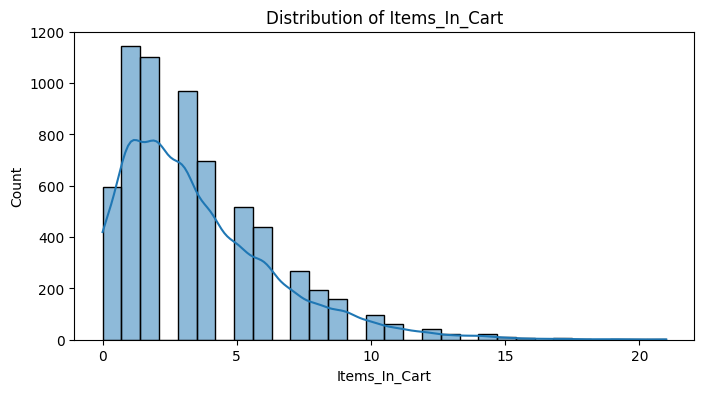

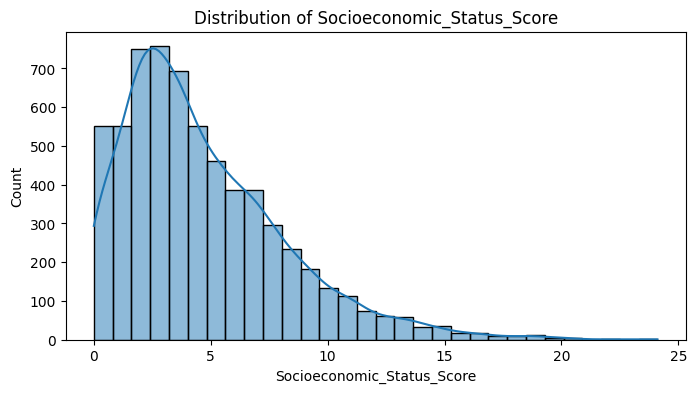

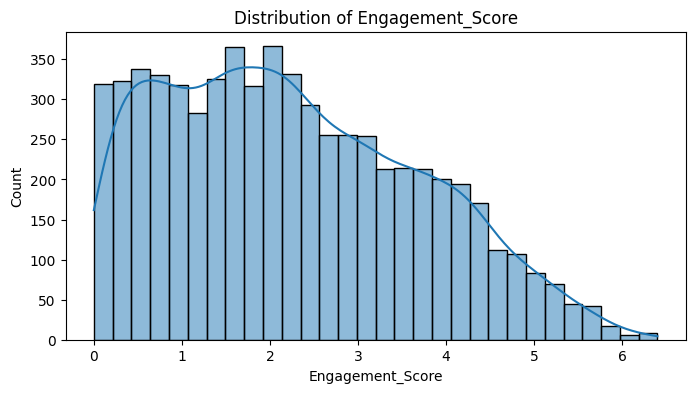

In [ ]:
# Plot the distribution for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

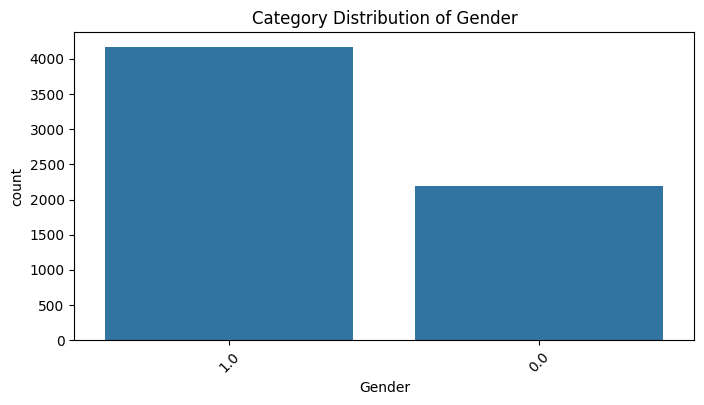

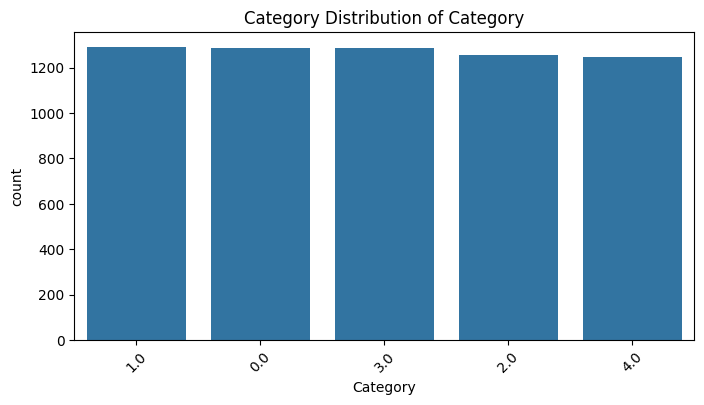

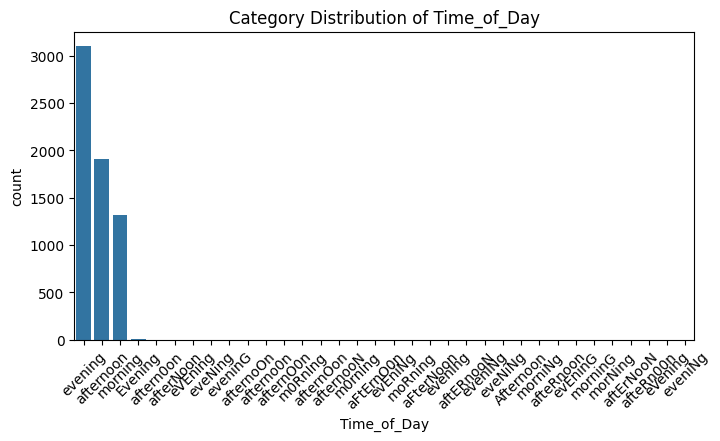

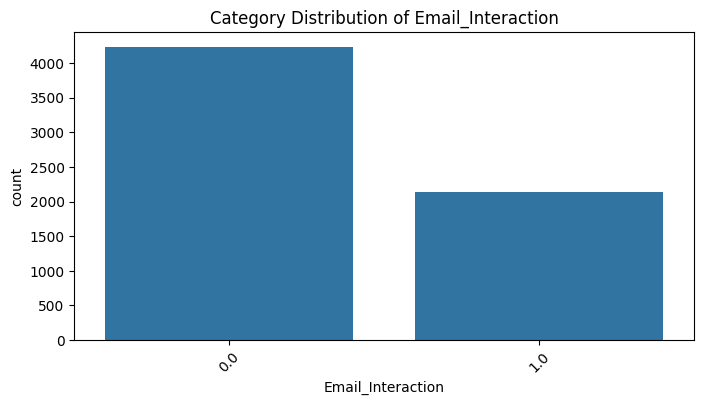

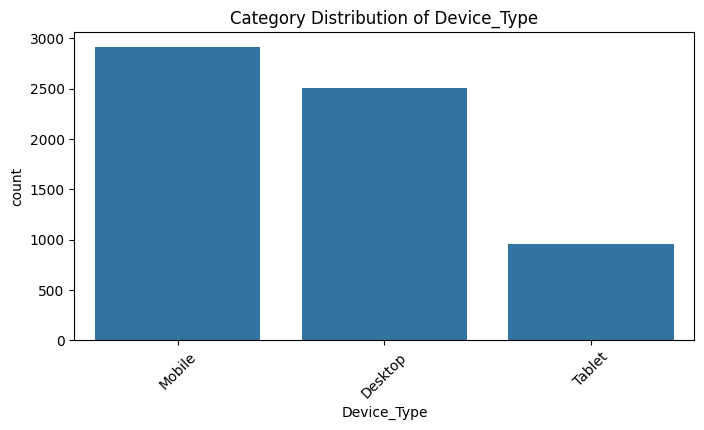

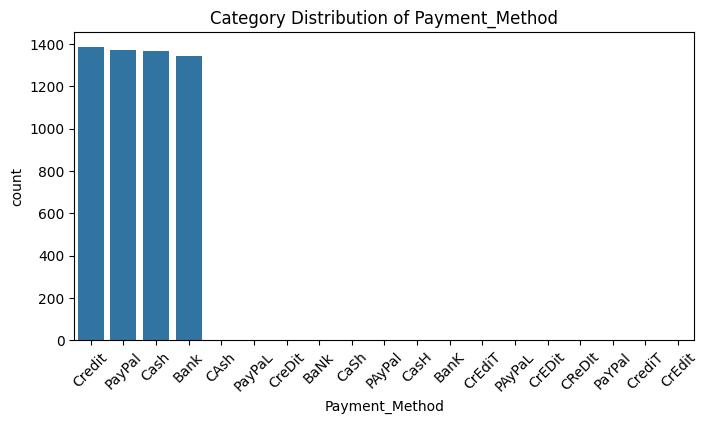

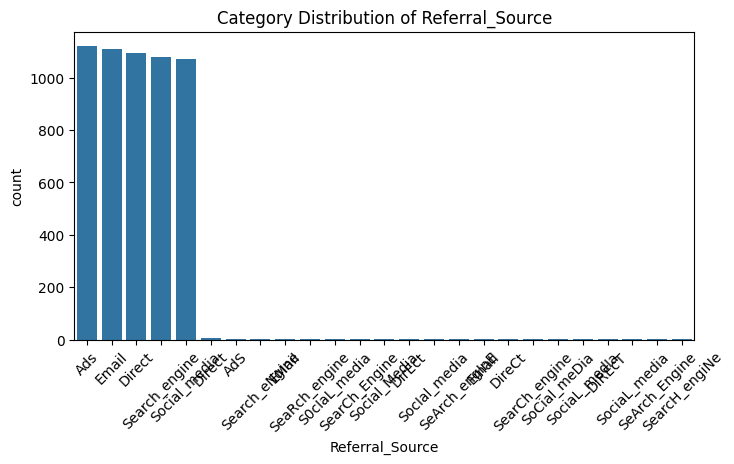

In [ ]:
# Distribution of Categorical Features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Category Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

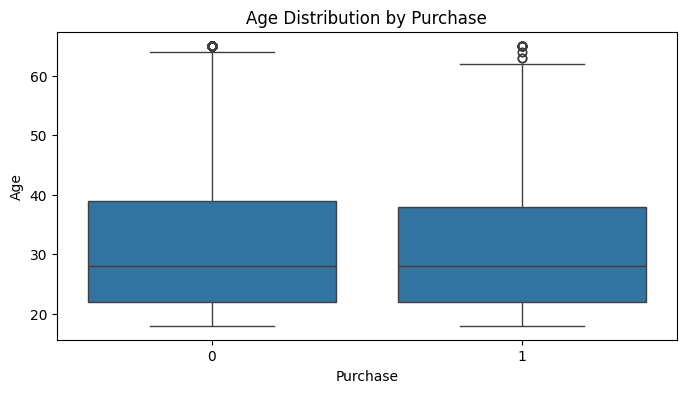

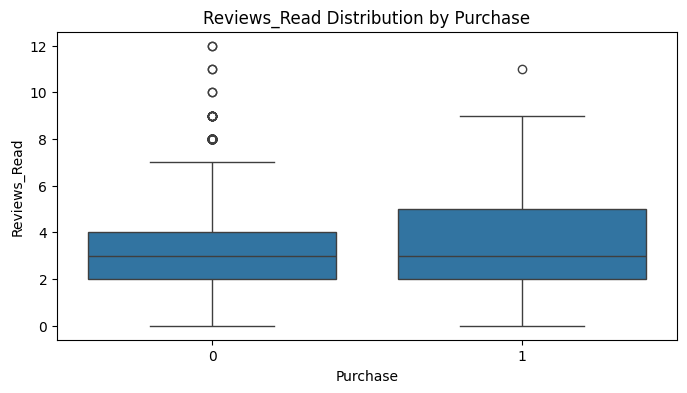

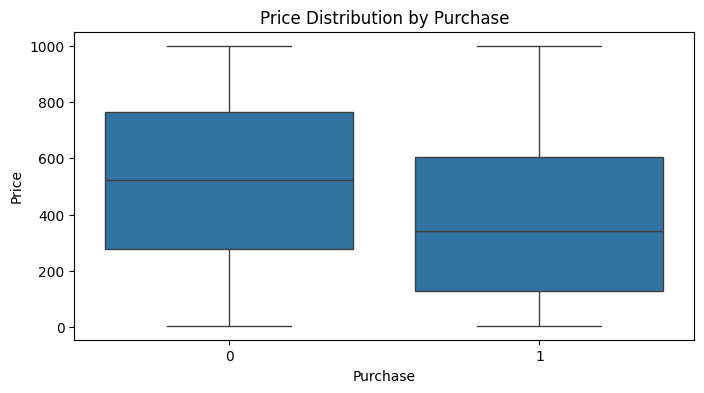

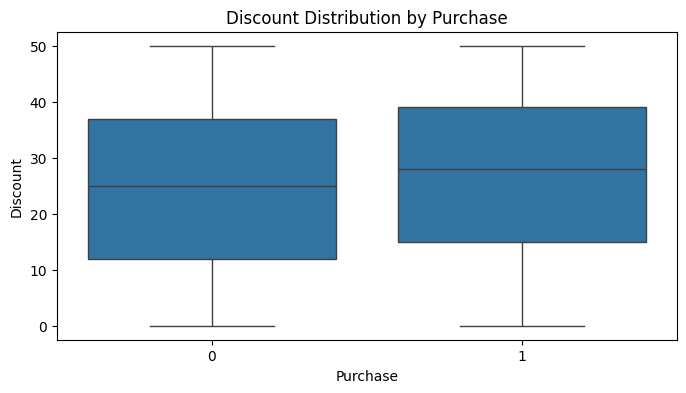

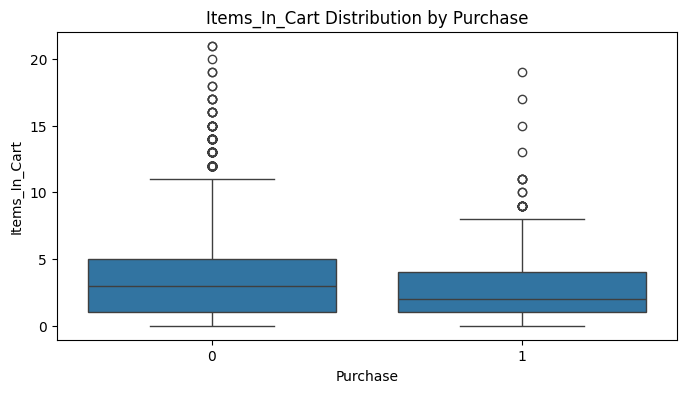

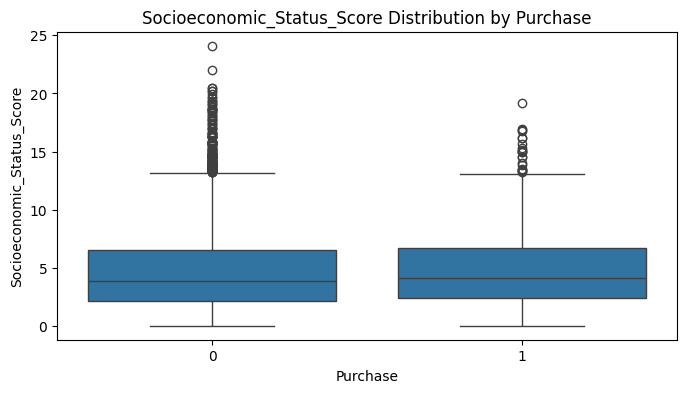

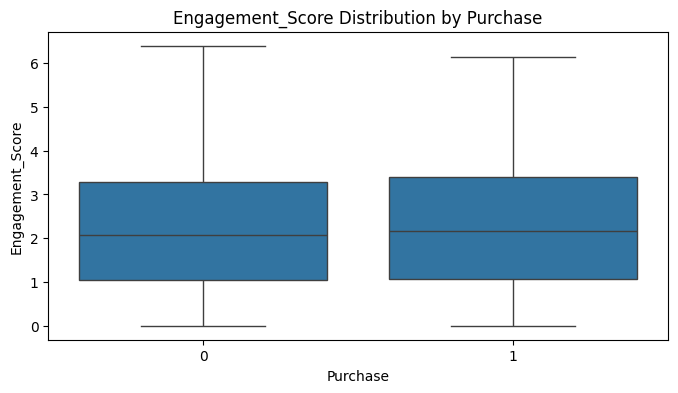

In [ ]:
# Relationship between numerical features and the target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 4))  # Set the figure size for better visualization

    # Plot a boxplot to show the distribution of the numerical feature for each target variable category
    sns.boxplot(x='Purchase', y=col, data=data)

    # Add a title to indicate the current feature being analyzed
    plt.title(f"{col} Distribution by Purchase")

    # Display the plot
    plt.show()

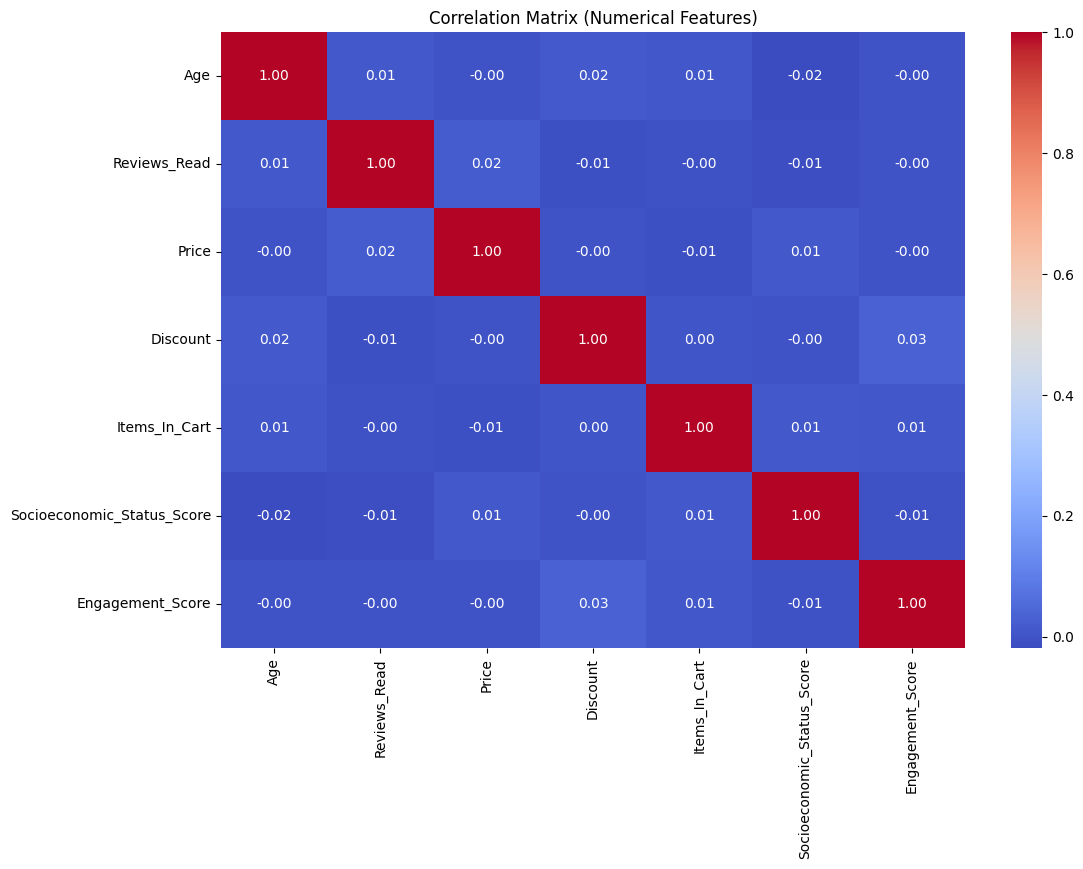

In [ ]:
# Correlation Between Features
# Analyze correlations only among numerical features
numerical_data = data[numerical_cols]  # Select numerical features from the dataset

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Set the figure size for a clear view of the matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Plot the heatmap with annotations
plt.title("Correlation Matrix (Numerical Features)")  # Add a title to describe the plot
plt.show()  # Display the heatmap

## Feature Engineering

In [ ]:
# Generate new features
# Create a new feature 'Effective_Price' based on 'Price' and 'Discount'
for dataset in [data, eval]:
    dataset['Effective_Price'] = dataset['Price'] * (1 - dataset['Discount'] / 100)

# Add the new feature to the list of numerical columns
numerical_cols.append('Effective_Price')

In [ ]:
# Automatically identify categorical variables
# Extract original string-type columns
original_string_cols = data.select_dtypes(include=['object']).columns.tolist()

# Identify columns that were originally numerical but converted to categorical
converted_string_cols = list(set(categorical_cols) - set(original_string_cols))

# Standardize categorical variables
for dataset in [data, eval]:
    # Process original string-type columns
    for col in original_string_cols:
        dataset[col] = dataset[col].astype(str).str.lower()  # Convert to lowercase
        dataset[col] = dataset[col].str.replace('0', 'o')  # Replace '0' with 'o'

    # Process columns originally numerical but now treated as strings
    for col in converted_string_cols:
        dataset[col] = dataset[col].astype(str)

# Validate the results
print("Original String Columns:", original_string_cols)  # Print list of original string columns
print("Converted String Columns:", converted_string_cols)  # Print list of converted columns

Original String Columns: ['Time_of_Day', 'Device_Type', 'Payment_Method', 'Referral_Source']
Converted String Columns: ['Category', 'Gender', 'Email_Interaction']


In [ ]:
# Check for missing values in categorical columns before processing
for dataset in [data, eval]:
    print(dataset[categorical_cols].isna().sum())  # Print missing values for each column

Gender               0
Category             0
Time_of_Day          0
Email_Interaction    0
Device_Type          0
Payment_Method       0
Referral_Source      0
dtype: int64
Gender               0
Category             0
Time_of_Day          0
Email_Interaction    0
Device_Type          0
Payment_Method       0
Referral_Source      0
dtype: int64


In [ ]:
# Check and convert hidden missing values in categorical variables to explicit NaN
for dataset in [data, eval]:
    for col in categorical_cols:
        dataset[col] = dataset[col].astype(str).replace(['', 'nan', 'N/A', '<NA>', 'None'], pd.NA)  # Replace hidden missing values with NaN

# Check missing values in categorical columns after conversion
for dataset in [data, eval]:
    print(dataset[categorical_cols].isna().sum())

Gender                141
Category              134
Time_of_Day           129
Email_Interaction     127
Device_Type           124
Payment_Method       1009
Referral_Source       997
dtype: int64
Gender                59
Category              66
Time_of_Day           71
Email_Interaction     73
Device_Type           76
Payment_Method       491
Referral_Source      503
dtype: int64


In [ ]:
# Check missing values in numerical columns before imputation
print("Missing values before imputation:")
for dataset in [data, eval]:
    print(dataset[numerical_cols].isna().sum())

Missing values before imputation:
Age                           970
Reviews_Read                  127
Price                         145
Discount                      124
Items_In_Cart                 141
Socioeconomic_Status_Score    120
Engagement_Score              135
Effective_Price               268
dtype: int64
Age                           530
Reviews_Read                   73
Price                          55
Discount                       76
Items_In_Cart                  59
Socioeconomic_Status_Score     80
Engagement_Score               65
Effective_Price               130
dtype: int64


In [ ]:
# Handle missing values
# Numerical columns: Fill missing values with the mean
num_imputer = SimpleImputer(strategy='mean')
for dataset in [data, eval]:
    dataset[numerical_cols] = num_imputer.fit_transform(dataset[numerical_cols])

# Categorical columns: Fill missing values based on specific rules
for dataset in [data, eval]:
    for col in categorical_cols:
        # Fill missing values
        if col in ['Payment_Method', 'Referral_Source']:  # Specific columns get a new category
            dataset[col] = dataset[col].fillna('unknown')
        else:  # Other columns use the mode
            dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [ ]:
# Confirm no missing values remain
for dataset in [data, eval]:
    print(dataset.isna().sum())

Age                           0
Gender                        0
Reviews_Read                  0
Price                         0
Discount                      0
Category                      0
Items_In_Cart                 0
Time_of_Day                   0
Email_Interaction             0
Device_Type                   0
Payment_Method                0
Referral_Source               0
Socioeconomic_Status_Score    0
Engagement_Score              0
Purchase                      0
Effective_Price               0
dtype: int64
Age                           0
Gender                        0
Reviews_Read                  0
Price                         0
Discount                      0
Category                      0
Items_In_Cart                 0
Time_of_Day                   0
Email_Interaction             0
Device_Type                   0
Payment_Method                0
Referral_Source               0
Socioeconomic_Status_Score    0
Engagement_Score              0
Effective_Price            

In [ ]:
# One-hot encoding for categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = []
encoded_eval = []

# Apply one-hot encoding and integrate it with the dataset
for dataset, storage in zip([data, eval], [encoded_data, encoded_eval]):
    # Encode categorical features
    encoded_categorical = encoder.fit_transform(dataset[categorical_cols])
    # Create a DataFrame for the encoded features
    encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols), index=dataset.index)
    # Drop original categorical columns
    dataset.drop(columns=categorical_cols, inplace=True)
    # Combine encoded features with the rest of the dataset
    storage.append(pd.concat([dataset, encoded_df], axis=1))

# Update the `data` and `eval` datasets with encoded versions
data = encoded_data[0]
eval = encoded_eval[0]

In [ ]:
# Standardize numerical features
scaler = StandardScaler()  # Initialize the standard scaler
for dataset in [data, eval]:
    # Apply standardization (zero mean, unit variance) to numerical columns
    dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Verify the results of standardization
for dataset_name, dataset in zip(["Training Data", "Evaluation Data"], [data, eval]):
    print(f"\n{dataset_name} numerical columns mean and std after scaling:")  # Print dataset name
    print(dataset[numerical_cols].mean())  # Mean should be approximately 0
    print(dataset[numerical_cols].std())   # Standard deviation should be approximately 1


Training Data numerical columns mean and std after scaling:
Age                           3.689357e-16
Reviews_Read                  8.963770e-17
Price                        -2.076971e-17
Discount                      7.105427e-17
Items_In_Cart                -5.848313e-17
Socioeconomic_Status_Score    5.137771e-17
Engagement_Score             -4.809828e-17
Effective_Price               7.105427e-17
dtype: float64
Age                           1.000077
Reviews_Read                  1.000077
Price                         1.000077
Discount                      1.000077
Items_In_Cart                 1.000077
Socioeconomic_Status_Score    1.000077
Engagement_Score              1.000077
Effective_Price               1.000077
dtype: float64

Evaluation Data numerical columns mean and std after scaling:
Age                          -3.324325e-16
Reviews_Read                  1.299278e-16
Price                        -8.120488e-17
Discount                     -3.973964e-16
Items_In_Cart     

In [ ]:
# Final feature list
feature_list = eval.columns.tolist()  # Extract the list of all column names in the evaluation dataset
print("Final Feature List:")  # Print a header for clarity
print(feature_list)  # Display the list of features

# Display the first few rows of the processed training dataset
print("Processed Training Data:")  # Header for processed training data
print(data.head())  # Show the first few rows of the training dataset

# Display the first few rows of the processed evaluation dataset
print("\nProcessed Evaluation Data:")  # Header for processed evaluation data
print(eval.head())  # Show the first few rows of the evaluation dataset

Final Feature List:
['Age', 'Reviews_Read', 'Price', 'Discount', 'Items_In_Cart', 'Socioeconomic_Status_Score', 'Engagement_Score', 'Effective_Price', 'Gender_0.0', 'Gender_1.0', 'Category_0.0', 'Category_1.0', 'Category_2.0', 'Category_3.0', 'Category_4.0', 'Time_of_Day_afternoon', 'Time_of_Day_evening', 'Time_of_Day_morning', 'Email_Interaction_0.0', 'Email_Interaction_1.0', 'Device_Type_desktop', 'Device_Type_mobile', 'Device_Type_tablet', 'Payment_Method_bank', 'Payment_Method_cash', 'Payment_Method_credit', 'Payment_Method_paypal', 'Payment_Method_unknown', 'Referral_Source_ads', 'Referral_Source_direct', 'Referral_Source_email', 'Referral_Source_search_engine', 'Referral_Source_social_media', 'Referral_Source_unknown']
Processed Training Data:
         Age  Reviews_Read     Price  Discount  Items_In_Cart  \
id                                                              
0  -1.011846     -1.176996  0.423223  0.004929       0.167870   
1  -0.846814      1.130648  0.162018  1.76246

### Random Forest Classification with SMOTE: Training, Evaluation, and Predictions

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Extract features and target variable from the training data
X = data[feature_list]  # Use feature_list for consistency
y = data['Purchase']  # Target variable

# Step 2: Address class imbalance using SMOTE
smote = SMOTE(random_state=42)  # Initialize SMOTE with a fixed random state
X_resampled, y_resampled = smote.fit_resample(X, y)  # Apply SMOTE to balance classes

# Step 3: Define preprocessing pipeline
# Define numerical and categorical columns
numerical_cols = ['Age', 'Reviews_Read', 'Price', 'Discount', 'Items_In_Cart',
                  'Socioeconomic_Status_Score', 'Engagement_Score', 'Effective_Price']
categorical_cols = [col for col in feature_list if col not in numerical_cols]

# Create a preprocessing transformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),
        ('cat', 'passthrough', categorical_cols)  # Pass categorical features without changes
    ]
)

# Step 4: Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', RandomForestClassifier(
        class_weight='balanced', random_state=42, max_depth=10,
        min_samples_split=5, min_samples_leaf=2, max_features='sqrt'  # Define model hyperparameters
    ))
])

# Step 5: Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_val)
print("F1 Score (weighted):", f1_score(y_val, y_pred, average='weighted'))  # Print F1 score
print("Classification Report:\n", classification_report(y_val, y_pred))  # Print classification report

# Step 8: Process the evaluation dataset
# Ensure evaluation dataset columns align with feature_list
X_eval = eval[feature_list]

# Step 9: Generate predictions for the evaluation dataset
evaluation_predictions = model.predict(X_eval)

# Step 10: Save prediction results to a CSV file
predictions_df = pd.DataFrame({
    'id': eval.index,  # Include ID column for reference
    'Purchase': evaluation_predictions  # Predicted target values
})
predictions_df.to_csv('purchase_predictions_eval_RF1.csv', index=False)
print("Predictions saved to 'purchase_predictions_eval_RF1.csv'")

# Step 11: Check the proportion of 0 and 1 in the Purchase predictions
print("\nProportion of 'Purchase' predictions (0 vs 1):")
print(predictions_df['Purchase'].value_counts(normalize=True))  # Display proportions

F1 Score (weighted): 0.896431679721497
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1170
           1       0.89      0.89      0.89      1128

    accuracy                           0.90      2298
   macro avg       0.90      0.90      0.90      2298
weighted avg       0.90      0.90      0.90      2298

Predictions saved to 'purchase_predictions_eval_RF1.csv'

Proportion of 'Purchase' predictions (0 vs 1):
Purchase
0    0.846857
1    0.153143
Name: proportion, dtype: float64


### Grid Search for Hyperparameter Tuning of Random Forest

In [ ]:
# Perform grid search to tune hyperparameters for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [8, 10, 12, 15],
    'n_estimators': [100, 300, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Use the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',  # Use weighted F1 Score as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores for acceleration
    verbose=2
)

# Perform grid search
grid_search.fit(X_resampled, y_resampled)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Train the final model using the best parameters
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'class_weight': None, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best F1 Score: 0.9306159274357995


### Randomized Search for Hyperparameter Tuning of Random Forest

In [ ]:
### Randomized Search for Hyperparameter Tuning of Random Forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter distributions for random search
param_dist = {
    'max_depth': [8, 10, 12, 15],  # Maximum depth of the trees
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'class_weight': [None, 'balanced']  # Class weight for handling imbalanced data
}

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=rf,  # Random forest classifier
    param_distributions=param_dist,  # Parameter distributions for sampling
    n_iter=50,  # Number of parameter settings sampled
    scoring='f1_weighted',  # Use weighted F1 Score for evaluation
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utilize all CPU cores for parallel processing
    random_state=42,  # Random state for reproducibility
    verbose=2  # Print detailed progress during the search
)

# Execute the randomized search
random_search.fit(X_resampled, y_resampled)  # Fit the model with resampled data

# Print the best parameters and corresponding F1 Score
print("Best Parameters:", random_search.best_params_)  # Output the optimal parameters
print("Best F1 Score:", random_search.best_score_)  # Output the best F1 Score

# Train the final model using the best parameters
best_rf = random_search.best_estimator_  # Retrieve the best model

Fitting 5 folds for each of 50 candidates, totalling 250 fits


### Random Forest Classification with StratifiedKFold and SMOTE: Training, Cross-Validation, and Predictions

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.ensemble import RandomForestClassifier  # For the classifier
from sklearn.pipeline import Pipeline  # For creating a pipeline
from sklearn.compose import ColumnTransformer  # For preprocessing columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For preprocessing numerical and categorical features
from sklearn.model_selection import StratifiedKFold  # For cross-validation
from sklearn.metrics import f1_score  # For model evaluation
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Step 1: Extract features and target variable
X = data[feature_list]  # Use feature_list to ensure consistent features
y = data['Purchase']  # Target variable

# Step 2: Define numerical and categorical features
numerical_cols = ['Age', 'Reviews_Read', 'Price', 'Discount', 'Items_In_Cart',
                  'Socioeconomic_Status_Score', 'Engagement_Score', 'Effective_Price']  # Numerical features
categorical_cols = [col for col in feature_list if col not in numerical_cols]  # Categorical features

# Step 3: Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Scale numerical features
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())  # Standardize numerical features to have zero mean and unit variance
        ]), numerical_cols),
        # One-hot encode categorical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Step 4: Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', RandomForestClassifier(
        class_weight='balanced',  # Automatically assign class weights to handle imbalanced data
        random_state=42,          # Set random state for reproducibility
        max_depth=10,             # Limit tree depth to prevent overfitting
        min_samples_split=5,      # Minimum number of samples required to split a node
        min_samples_leaf=2,       # Minimum number of samples required at a leaf node
        max_features='sqrt'       # Use the square root of the number of features for each split
    ))
])

# Step 5: Perform StratifiedKFold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Ensure balanced folds for target classes
f1_scores = []  # List to store F1 scores for each fold

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"Processing Fold {fold + 1}")  # Print current fold number

    # Split data into training and validation sets for the current fold
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Step 6: Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)  # Initialize SMOTE
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  # Apply SMOTE to resample the training set

    # Step 7: Train the model
    model_pipeline.fit(X_train_resampled, y_train_resampled)  # Fit the model on the resampled training set

    # Step 8: Validate the model
    y_pred = model_pipeline.predict(X_val)  # Predict on the validation set
    f1 = f1_score(y_val, y_pred, average='weighted')  # Calculate weighted F1 score
    f1_scores.append(f1)  # Append F1 score for this fold
    print(f"F1 Score for Fold {fold + 1}: {f1}")  # Print F1 score for the current fold

# Output the mean and standard deviation of the F1 scores across all folds
print(f"Mean F1 Score: {np.mean(f1_scores)}")  # Average F1 score
print(f"F1 Score Standard Deviation: {np.std(f1_scores)}")  # Standard deviation of F1 scores

# Step 9: Generate predictions for the evaluation dataset
# Ensure evaluation data columns align with feature_list
X_eval = eval[feature_list]
eval_predictions = model_pipeline.predict(X_eval)  # Predict on the evaluation dataset

# Step 10: Save predictions to a CSV file
predictions_df = pd.DataFrame({
    'id': eval.index,  # Include ID column
    'Purchase': eval_predictions  # Predicted Purchase values
})
predictions_df.to_csv('purchase_predictions_eval_StratifiedKFold.csv', index=False)  # Save predictions to CSV
print("Predictions saved to 'purchase_predictions_eval_StratifiedKFold.csv'")

# Step 11: Check the proportion of 0 and 1 in the Purchase predictions
print("\nProportion of 'Purchase' predictions (0 vs 1):")
print(predictions_df['Purchase'].value_counts(normalize=True))  # Display proportions

Processing Fold 1
F1 Score for Fold 1: 0.763065860342515
Processing Fold 2
F1 Score for Fold 2: 0.7847168472490937
Processing Fold 3
F1 Score for Fold 3: 0.7671107204216661
Processing Fold 4
F1 Score for Fold 4: 0.796077176644153
Processing Fold 5
F1 Score for Fold 5: 0.7819678050449199
Mean F1 Score: 0.7785876819404696
F1 Score Standard Deviation: 0.012062519769887863
Predictions saved to 'purchase_predictions_eval_StratifiedKFold.csv'

Proportion of 'Purchase' predictions (0 vs 1):
Purchase
0    0.709429
1    0.290571
Name: proportion, dtype: float64


In [ ]:
# Iterate through each feature in feature_list to check its correlation with the target variable 'Purchase'
for feature in feature_list:
    # Calculate the Pearson correlation coefficient between the feature and the target variable
    correlation = data[[feature, 'Purchase']].corr().iloc[0, 1]
    print(f"Correlation between {feature} and 'Purchase': {correlation}")  # Print the correlation value

    # If correlation is greater than 0.9 or less than -0.9, flag it for further analysis
    if abs(correlation) > 0.9:
        print(f"Warning: The feature '{feature}' has a high correlation ({correlation}) with 'Purchase'.")
        print("Further investigation of this feature's generation logic is recommended.")

Correlation between Age and 'Purchase': -0.013606438328068713
Correlation between Reviews_Read and 'Purchase': 0.06895544273169786
Correlation between Price and 'Purchase': -0.13853470329149334
Correlation between Discount and 'Purchase': 0.057185981670478836
Correlation between Items_In_Cart and 'Purchase': -0.08160386586570842
Correlation between Socioeconomic_Status_Score and 'Purchase': 0.022806194209239142
Correlation between Engagement_Score and 'Purchase': 0.015239575501343139
Correlation between Effective_Price and 'Purchase': -0.1423217801248053
Correlation between Gender_0.0 and 'Purchase': 0.1280829674815754
Correlation between Gender_1.0 and 'Purchase': -0.12808296748157555
Correlation between Category_0.0 and 'Purchase': 0.010152654977125086
Correlation between Category_1.0 and 'Purchase': 0.01074243964721323
Correlation between Category_2.0 and 'Purchase': 0.01813076998627024
Correlation between Category_3.0 and 'Purchase': -0.019962094471305467
Correlation between Catego